In [5]:
import matplotlib as mpl
import matplotlib.pyplot as plt

In [6]:
# If black figure is undesirable, just press "R" to disable this cell.
mpl.rcParams["grid.color"] = "w"
mpl.rcParams["axes.facecolor"] = "w"
mpl.rcParams["axes.edgecolor"] = "w"
mpl.rcParams["axes.titlecolor"] = "w"
mpl.rcParams["axes.labelcolor"] = "w"
mpl.rcParams["text.color"] = "w"
mpl.rcParams["xtick.color"] = "w"
mpl.rcParams["ytick.color"] = "w"

mpl.rcParams["axes.facecolor"] = "k"
mpl.rcParams["figure.facecolor"] = "k"
mpl.rcParams["figure.figsize"] = (8,6)
mpl.rcParams["axes.grid"] = False

In [8]:
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn import datasets
import numpy as np

In [9]:
def plot_svc_decision_boundary(svm_clf, xmin, xmax):
    w = svm_clf.coef_[0]
    b = svm_clf.intercept_[0]

    # At the decision boundary, w0*x0 + w1*x1 + b = 0
    # => x1 = -w0/w1 * x0 - b/w1
    x0 = np.linspace(xmin, xmax, 200)
    decision_boundary = -w[0]/w[1] * x0 - b/w[1]

    margin = 1/w[1]
    gutter_up = decision_boundary + margin
    gutter_down = decision_boundary - margin

    svs = svm_clf.support_vectors_
    plt.scatter(svs[:, 0], svs[:, 1], s=180, facecolors='#FFAAAA')
    if mpl.rcParams["figure.facecolor"] == "k":
        color = "w"
    else:
        color = "k"
    plt.plot(x0, decision_boundary, f"{color}-", linewidth=2)
    plt.plot(x0, gutter_up, f"{color}--", linewidth=2)
    plt.plot(x0, gutter_down, f"{color}--", linewidth=2)

> _SVMs are particularly well suited for classification of complex but **small- or medium**-sized
datasets._

**(?1)** Why small- and medium-sized datasets only? Why is it better to use DL for large-sized
dataset and how large does Mr. Geron mean by large?

**(?2)** Mr. Geron emphasized the importance of feature scaling before doing linear SVM.
In Figure 5-1, we do see that the lines seem to have different slopes,
but are they **_only so visually_** $\;$ or $\;$ **_numerically they are indeed of quite different slope values_**?

In [10]:
Xs = np.array([[1, 50], [5, 20], [3, 80], [5, 60]]).astype(np.float64)
ys = np.array([0, 0, 1, 1])
svm_clf = SVC(kernel="linear", C=100)
svm_clf.fit(Xs, ys)

SVC(C=100, kernel='linear')

In [11]:
# decision boundary: wo*x0 + w1*x1 + b = 0, where
# w = svm_clf.coef_ and b = svm_clf.intercept_
svm_clf.coef_

array([[0.06896552, 0.17241379]])

In [12]:
svm_clf.intercept_

array([-9.68965517])

In [13]:
svm_clf.support_

array([0, 3], dtype=int32)

**(?3)** Is `support_` the distances from the support vectors (i.e. `support_vectors_`, cf. the next cell) to the decision boundary?

In [14]:
svm_clf.support_vectors_

array([[ 1., 50.],
       [ 5., 60.]])

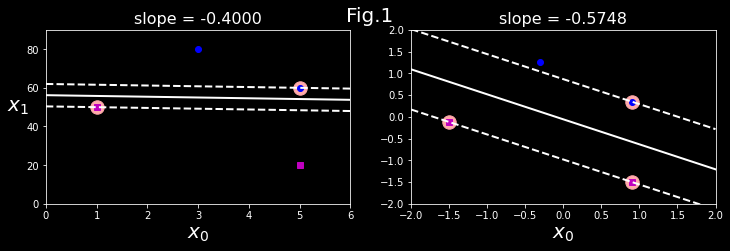

In [15]:
fig = plt.figure(figsize=(12,3.2))
plt.subplot(121)
plt.plot(Xs[:, 0][ys==1], Xs[:, 1][ys==1], "bo")
plt.plot(Xs[:, 0][ys==0], Xs[:, 1][ys==0], "ms")
plot_svc_decision_boundary(svm_clf, 0, 6)
plt.xlabel("$x_0$", fontsize=20)
plt.ylabel("$x_1$  ", fontsize=20, rotation=0)
w0, w1 = svm_clf.coef_[0]
slope = - w0/w1
plt.title(f"slope = {slope:.4f}", fontsize=16)
plt.axis([0, 6, 0, 90])

scaler = StandardScaler()
X_scaled = scaler.fit_transform(Xs)
scaled_svm_clf = SVC(kernel="linear", C=100)
scaled_svm_clf.fit(X_scaled, ys)

plt.subplot(122)
plt.plot(X_scaled[:, 0][ys==1], X_scaled[:, 1][ys==1], "bo")
plt.plot(X_scaled[:, 0][ys==0], X_scaled[:, 1][ys==0], "ms")
plot_svc_decision_boundary(scaled_svm_clf, -2, 2)
plt.xlabel("$x_0$", fontsize=20)
w0, w1 = scaled_svm_clf.coef_[0]
scaled_slope = - w0/w1
plt.title(f"slope = {scaled_slope:.4f}", fontsize=16)
#plt.title("Scaled", fontsize=16)
plt.axis([-2, 2, -2, 2]);
fig.suptitle('Fig.1', fontsize=20);

There is difference in the magnitude of the slopes before and after scaling.

Let's try to find a point
- which is classified safely as square magenta point on the left
- and which causes trouble by crossing the decision boundary towards the blue circular point territory on the right.

I decide to simply add points on the dashed line (i.e. on the border of the street) on the left subplot in the Figure above. To do this we simply take the points on the border and follow along the direction of the slope. We call these points `A` and `B` below.

In [16]:
xA = 5.7
yA = Xs[0][1] + slope*(xA - Xs[0][0])
A = [xA, yA]
xB = 0.2
yB = Xs[-1][1] + slope*(xB - Xs[-1][0])
B = [xB, yB]
extra_data = np.array([A, B]).astype(np.float64)
extra_data

array([[ 5.7 , 48.12],
       [ 0.2 , 61.92]])

In [17]:
X_aug = np.vstack([Xs, extra_data])
X_aug

array([[ 1.  , 50.  ],
       [ 5.  , 20.  ],
       [ 3.  , 80.  ],
       [ 5.  , 60.  ],
       [ 5.7 , 48.12],
       [ 0.2 , 61.92]])

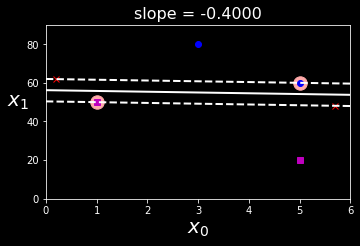

In [18]:
plt.figure(figsize=(12,3.2))
plt.subplot(121)
plt.plot(Xs[:, 0][ys==1], Xs[:, 1][ys==1], "bo")
plt.plot(Xs[:, 0][ys==0], Xs[:, 1][ys==0], "ms")
plt.plot(X_aug[-2:, 0], X_aug[-2:, 1], "rx")
plot_svc_decision_boundary(svm_clf, 0, 6)
plt.xlabel("$x_0$", fontsize=20)
plt.ylabel("$x_1$  ", fontsize=20, rotation=0)
w0, w1 = svm_clf.coef_[0]
slope = - w0/w1
plt.title(f"slope = {slope:.4f}", fontsize=16)
plt.axis([0, 6, 0, 90]);

In [19]:
scaler.transform(X_aug)

array([[-1.50755672, -0.11547005],
       [ 0.90453403, -1.5011107 ],
       [-0.30151134,  1.27017059],
       [ 0.90453403,  0.34641016],
       [ 1.32664992, -0.20230353],
       [-1.98997487,  0.43509116]])

In [20]:
X_scaled

array([[-1.50755672, -0.11547005],
       [ 0.90453403, -1.5011107 ],
       [-0.30151134,  1.27017059],
       [ 0.90453403,  0.34641016]])

In [21]:
scaler.transform(extra_data)

array([[ 1.32664992, -0.20230353],
       [-1.98997487,  0.43509116]])

In [22]:
scaler.transform([A])

array([[ 1.32664992, -0.20230353]])

In [23]:
scaler.transform([B])

array([[-1.98997487,  0.43509116]])

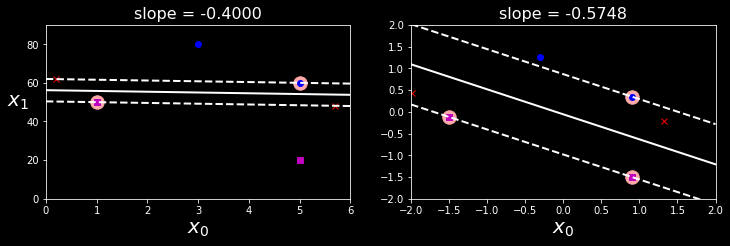

In [24]:
plt.figure(figsize=(12,3.2))
plt.subplot(121)
plt.plot(Xs[:, 0][ys==1], Xs[:, 1][ys==1], "bo")
plt.plot(Xs[:, 0][ys==0], Xs[:, 1][ys==0], "ms")
#plt.plot(X_aug[-2:, 0], X_aug[-2:, 1], "rx")
plt.plot(extra_data[:, 0], extra_data[:, 1], "rx")
plot_svc_decision_boundary(svm_clf, 0, 6)
plt.xlabel("$x_0$", fontsize=20)
plt.ylabel("$x_1$  ", fontsize=20, rotation=0)
w0, w1 = svm_clf.coef_[0]
slope = - w0/w1
plt.title(f"slope = {slope:.4f}", fontsize=16)
plt.axis([0, 6, 0, 90]);

#A_scaled = scaler.transform([A])[0]
#B_scaled = scaler.transform([B])[0]
extra_data_scaled = scaler.transform(extra_data)

plt.subplot(122)
plt.plot(X_scaled[:, 0][ys==1], X_scaled[:, 1][ys==1], "bo")
plt.plot(X_scaled[:, 0][ys==0], X_scaled[:, 1][ys==0], "ms")
plt.plot(extra_data_scaled[:, 0], extra_data_scaled[:, 1], "rx")
plot_svc_decision_boundary(scaled_svm_clf, -2, 2)
plt.xlabel("$x_0$", fontsize=20)
w0, w1 = scaled_svm_clf.coef_[0]
scaled_slope = - w0/w1
plt.title(f"slope = {scaled_slope:.4f}", fontsize=16)
plt.axis([-2, 2, -2, 2]);

Need to plot the points `A` and `B` separately in order to better see which points corresponds to which.

In [25]:
A_scaled = scaler.transform([A])[0]
A_scaled

array([ 1.32664992, -0.20230353])

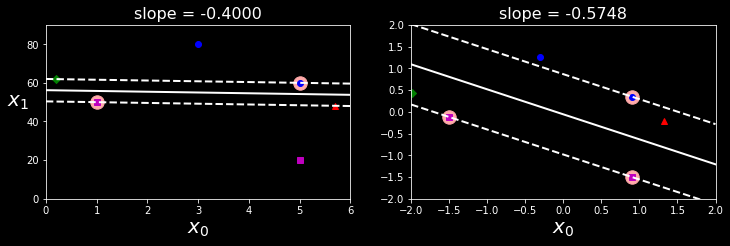

In [26]:
plt.figure(figsize=(12,3.2))
plt.subplot(121)
plt.plot(Xs[:, 0][ys==1], Xs[:, 1][ys==1], "bo")
plt.plot(Xs[:, 0][ys==0], Xs[:, 1][ys==0], "ms")
#plt.plot(X_aug[-2:, 0], X_aug[-2:, 1], "rx")
#plt.plot(extra_data[:, 0], extra_data[:, 1], "rx")
## See for more markers: ^ for triangle, D for diamond
## https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.plot.html
plt.plot(xA, yA, "r^")
plt.plot(xB, yB, "gD")
plot_svc_decision_boundary(svm_clf, 0, 6)
plt.xlabel("$x_0$", fontsize=20)
plt.ylabel("$x_1$  ", fontsize=20, rotation=0)
w0, w1 = svm_clf.coef_[0]
slope = - w0/w1
plt.title(f"slope = {slope:.4f}", fontsize=16)
plt.axis([0, 6, 0, 90]);

A_scaled = scaler.transform([A])[0]
B_scaled = scaler.transform([B])[0]
#extra_data_scaled = scaler.transform([B])[0]

plt.subplot(122)
plt.plot(X_scaled[:, 0][ys==1], X_scaled[:, 1][ys==1], "bo")
plt.plot(X_scaled[:, 0][ys==0], X_scaled[:, 1][ys==0], "ms")
plt.plot(A_scaled[0], A_scaled[1], "r^")
plt.plot(B_scaled[0], B_scaled[1], "gD")
plot_svc_decision_boundary(scaled_svm_clf, -2, 2)
plt.xlabel("$x_0$", fontsize=20)
w0, w1 = scaled_svm_clf.coef_[0]
scaled_slope = - w0/w1
plt.title(f"slope = {scaled_slope:.4f}", fontsize=16)
plt.axis([-2, 2, -2, 2]);

## Try labeling `A` and `B`
Another good way is to label `A` and `B` and see what will happen.

By labeling `A` and `B`, we mean
- Label them
  - either `A, B` as `0, 1`
  - or `A, B` as `1, 0`
- Train SVM on the entire dataset including `A` and `B`

In [27]:
X_aug

array([[ 1.  , 50.  ],
       [ 5.  , 20.  ],
       [ 3.  , 80.  ],
       [ 5.  , 60.  ],
       [ 5.7 , 48.12],
       [ 0.2 , 61.92]])

In [28]:
ys

array([0, 0, 1, 1])

In [29]:
y_aug = np.concatenate([ys, [0,1]])
y_aug

array([0, 0, 1, 1, 0, 1])

In [30]:
X_aug_scaled = scaler.fit_transform(X_aug)
X_aug_scaled

array([[-1.10175287, -0.18392193],
       [ 0.80055425, -1.83591533],
       [-0.15059931,  1.46807147],
       [ 0.80055425,  0.36674253],
       [ 1.13345799, -0.28744685],
       [-1.4822143 ,  0.47247011]])

In [31]:
X_scaled

array([[-1.50755672, -0.11547005],
       [ 0.90453403, -1.5011107 ],
       [-0.30151134,  1.27017059],
       [ 0.90453403,  0.34641016]])

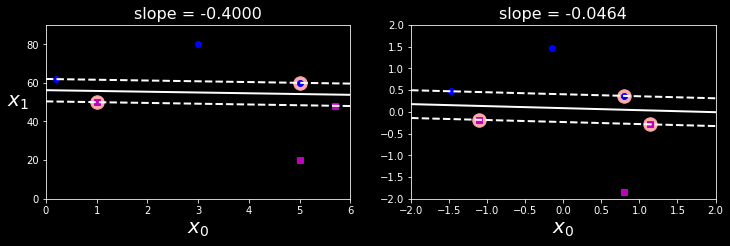

In [32]:
another_svm_clf = SVC(kernel="linear", C=100)
another_svm_clf.fit(X_aug, y_aug)
plt.figure(figsize=(12,3.2))
plt.subplot(121)
plt.plot(X_aug[:, 0][y_aug==1], X_aug[:, 1][y_aug==1], "bo")
plt.plot(X_aug[:, 0][y_aug==0], X_aug[:, 1][y_aug==0], "ms")
plot_svc_decision_boundary(another_svm_clf, 0, 6)
plt.xlabel("$x_0$", fontsize=20)
plt.ylabel("$x_1$  ", fontsize=20, rotation=0)
w0, w1 = another_svm_clf.coef_[0]
slope = - w0/w1
plt.title(f"slope = {slope:.4f}", fontsize=16)
plt.axis([0, 6, 0, 90]);

another_svm_clf.fit(X_aug_scaled, y_aug)
plt.subplot(122)
plt.plot(X_aug_scaled[:, 0][y_aug==1], X_aug_scaled[:, 1][y_aug==1], "bo")
plt.plot(X_aug_scaled[:, 0][y_aug==0], X_aug_scaled[:, 1][y_aug==0], "ms")
plot_svc_decision_boundary(another_svm_clf, -2, 2)
plt.xlabel("$x_0$", fontsize=20)
w0, w1 = another_svm_clf.coef_[0]
scaled_slope = - w0/w1
plt.title(f"slope = {scaled_slope:.4f}", fontsize=16)
plt.axis([-2, 2, -2, 2]);

It seems that in this case, **they did the job equally well**. Now, let's turn to the remaining case.

In [33]:
y_aug = np.concatenate([ys, [1,0]])
y_aug

array([0, 0, 1, 1, 1, 0])

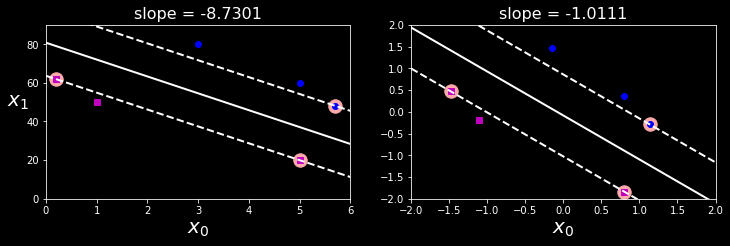

In [34]:
#another_svm_clf = SVC(kernel="linear", C=100)
another_svm_clf.fit(X_aug, y_aug)
plt.figure(figsize=(12,3.2))
plt.subplot(121)
plt.plot(X_aug[:, 0][y_aug==1], X_aug[:, 1][y_aug==1], "bo")
plt.plot(X_aug[:, 0][y_aug==0], X_aug[:, 1][y_aug==0], "ms")
plot_svc_decision_boundary(another_svm_clf, 0, 6)
plt.xlabel("$x_0$", fontsize=20)
plt.ylabel("$x_1$  ", fontsize=20, rotation=0)
w0, w1 = another_svm_clf.coef_[0]
slope = - w0/w1
plt.title(f"slope = {slope:.4f}", fontsize=16)
plt.axis([0, 6, 0, 90]);

another_svm_clf.fit(X_aug_scaled, y_aug)
plt.subplot(122)
plt.plot(X_aug_scaled[:, 0][y_aug==1], X_aug_scaled[:, 1][y_aug==1], "bo")
plt.plot(X_aug_scaled[:, 0][y_aug==0], X_aug_scaled[:, 1][y_aug==0], "ms")
plot_svc_decision_boundary(another_svm_clf, -2, 2)
plt.xlabel("$x_0$", fontsize=20)
w0, w1 = another_svm_clf.coef_[0]
scaled_slope = - w0/w1
plt.title(f"slope = {scaled_slope:.4f}", fontsize=16)
plt.axis([-2, 2, -2, 2]);

## Real, larger example(s)
In order to prove the necessity (or utility) of feature scaling, let's try some real, larger example(s) and compare the results of SVM w/ and w/o feature scaling.

A few ideas for the dataset:
- Iris rescaled
- moon dataset (rescaled)

In [35]:
from sklearn import datasets

In [36]:
iris = datasets.load_iris()
X = iris["data"][:, [2,3]]
y = iris["target"]
X.shape, y.shape

((150, 2), (150,))

In [37]:
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [38]:
setosa_or_versicolor = (y == 0) | (y == 1)
X = X[setosa_or_versicolor]
y = y[setosa_or_versicolor]
X.shape, y.shape

((100, 2), (100,))

In [39]:
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [40]:
petal_length = X[:,0]
np.max(petal_length), np.min(petal_length), np.median(petal_length)

(5.1, 1.0, 2.45)

In [41]:
petal_width = X[:,1]
np.max(petal_width), np.min(petal_width), np.median(petal_width)

(1.8, 0.1, 0.8)

In [42]:
dir(iris)

['DESCR',
 'data',
 'feature_names',
 'filename',
 'frame',
 'target',
 'target_names']

In [43]:
iris["feature_names"]

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

Let's switch the unit of `petal width` to `milli meter` so that we have the two features at diff scales.

In [44]:
X_diff_scale = X.copy()
X_diff_scale.shape, X.shape

((100, 2), (100, 2))

In [45]:
X_diff_scale[:,1] = petal_width*(1e+4)

In [46]:
for i in range(10):
    print(X[i], X_diff_scale[i])

[1.4 0.2] [1.4e+00 2.0e+03]
[1.4 0.2] [1.4e+00 2.0e+03]
[1.3 0.2] [1.3e+00 2.0e+03]
[1.5 0.2] [1.5e+00 2.0e+03]
[1.4 0.2] [1.4e+00 2.0e+03]
[1.7 0.4] [1.7e+00 4.0e+03]
[1.4 0.3] [1.4e+00 3.0e+03]
[1.5 0.2] [1.5e+00 2.0e+03]
[1.4 0.2] [1.4e+00 2.0e+03]
[1.5 0.1] [   1.5 1000. ]


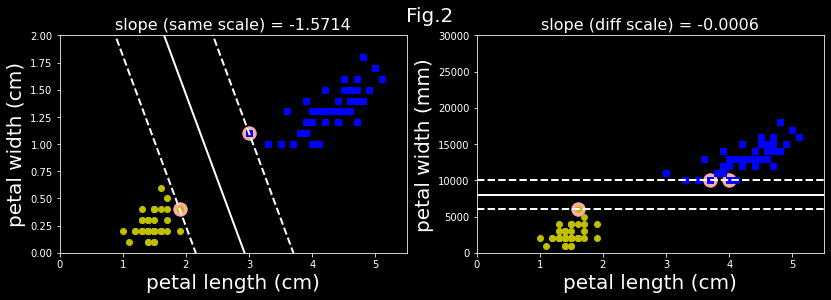

In [47]:
svm_clf.fit(X, y)
fig = plt.figure(figsize=(13.7, 4))
plt.subplot(121)
plt.plot(X[:, 0][y==1], X[:, 1][y==1], "bs")
plt.plot(X[:, 0][y==0], X[:, 1][y==0], "yo")
plot_svc_decision_boundary(svm_clf, 0, 5.5)
plt.xlabel("petal length (cm)", fontsize=20)
plt.ylabel("petal width (cm)", fontsize=20)
w0, w1 = svm_clf.coef_[0]
slope = - w0/w1
plt.title(f"slope (same scale) = {slope:.4f}", fontsize=16)
plt.axis([0, 5.5, 0, 2])

svm_clf.fit(X_diff_scale, y)

plt.subplot(122)
plt.plot(X_diff_scale[:, 0][y==1], X_diff_scale[:, 1][y==1], "bs")
plt.plot(X_diff_scale[:, 0][y==0], X_diff_scale[:, 1][y==0], "yo")
plot_svc_decision_boundary(svm_clf, 0, 5.5)
#plt.xlabel("$x_0$", fontsize=20)
plt.xlabel("petal length (cm)", fontsize=20)
plt.ylabel("petal width (mm)", fontsize=20)
w0, w1 = svm_clf.coef_[0]
scaled_slope = - w0/w1
plt.title(f"slope (diff scale) = {scaled_slope:.4f}", fontsize=16)
plt.axis([0, 5.5, 0, 3e+4]);
fig.suptitle('Fig.2', fontsize=20);

At the point I just finished plotting the above, I once thought, "Damn it, I met a dead end again." So I thought of going asking this question on the Internet, say, facebook group or even to the author himself.

Eventually someone named 黃珈擇 on the facebook group "Python Taiwan" helped illuminate the question.
- [https://www.facebook.com/groups/pythontw/?multi_permalinks=10161075022278438&notif_id=1615444508072515&notif_t=feedback_reaction_generic&ref=notif](https://www.facebook.com/groups/pythontw/?multi_permalinks=10161075022278438&notif_id=1615444508072515&notif_t=feedback_reaction_generic&ref=notif)

In addition, I also found some related discussions.
- [https://stackoverflow.com/questions/15436367/svm-scaling-input-values](https://stackoverflow.com/questions/15436367/svm-scaling-input-values)
- [https://www.csie.ntu.edu.tw/~cjlin/papers/guide/guide.pdf](https://www.csie.ntu.edu.tw/~cjlin/papers/guide/guide.pdf)

Basically, what 黃珈擇 told me is that since SVM makes its decisions based on distances, if one particular feature is of greater scale than the rest, **its contribution to the computation of distance is also greater than the other features**, thus making the other features a lot less important.

**Consequence**: On a 2D dataset, a reflection of this is that the decision boundary will tend to be horizontal (i.e. of slope $0$) or vertical (i.e. of slope $\infty$), which in plain words says that **the decision only relies on one particular feature**. This phenomenon does appear (not only once) in our foregoing discussion. 

## Recap
Since there are some **subtleties**, and since this seems to be somewhat important, let me **rephrase** what I just said above.

In the examples/plots above, I have always been searching (_in the wrong direction_) for evidence that **without feature scaling, SVM will suffer**.
And the reason why I couldn't seem to find an answer to my quest is that
- With or without feature scaling, SVM all seems to be capable of separating the two classes, be it the artificial five-point set or the Iris dataset;
- So I wrongly concluded that I hadn't found any good example for this.

However, the truth is that
- Without feature scaling, it does not mean that SVM would be incapable of finding a clear decision boundary which well separates the data points into two classes;
- Instead, in the case of 2D space (i.e. data with 2 features), in which one feature is equipped with much greater scale than the other, doing SVM without first scaling the dataset's feautres simply means that we are neglecting the feature with smaller scale, **as if we were doing the same SVM but with only one feature**.

So, it is just redundant to collect many features but to not do feature scaling before using SVM. Those features with much smaller scales will simply become waste. It might be interesting if you can conduct
similar study in higher dimensions (i.e. `3, 4, 5, ...` features, or even millions of features; `3D` might be preferable because we are still able to visualize it), or conduct a mathematical analysis supporting
this thought.


## Fun Fact
1. In a coordinate system, where the scale (i.e. the measuring unit) of the axes are different (e.g. in 2D if we trace
a 1-cm line segment along the $x$-axis, that represents 1 km, while the a 1-cm segment along the $y$-axis would
represent 1 mm.), **distances can only be rightfully measured along the axes** (e.g. in 2D two points of coordinates
`(x0 km, y0 mm)`, `(x1 km, y1 mm)`. Its distance cannot be calculated<br> by `sqrt((x0-x1)**2 + (y0-y1)**2)`.) In other words, the visual length of a segment on such plots does not really tell us really how long it is, be it along the axes or not.
1. Let's think about why in 2D, a huge scale, say in the $x$-axis, with a tiny scale, in the $y$-axis, results in a **nearly vertical** decision boundary.
  - Why, in the unscaled example of Iris dataset, isn't the slope of the decision boundary closer to zero? (Only `-0.0006`)
1. blah blah blah

Here is some random thought on the 2nd point -- I don't think that it is a good discussion; I included it here just because I wanted to mark the track I have gone through. And the following calculations might just be non-sense.

![figs/svm_inbalanced_scales.jpg](figs/svm_inbalanced_scales.jpg)


A good answer to 2nd point must be based on a good understanding of how SVM works mathematically.

\begin{align}
  y = sx \\
  sx - y = 0 \\
  d(P, \ell) = \frac{sx_1 - y_1}{\sqrt{s^2 + 1}} \\
  d(d(P, \ell))/ds = 0 \iff -y_1 s - x_1 = 0 \iff s = - \frac{x_1}{y_1}\\
  d^2(d(P, \ell))/ds^2 = - y_1 < 0 \quad \text{(concave)}
\end{align}

In [48]:
svm_clf.coef_, svm_clf.coef0

(array([[2.90624927e-07, 4.99999878e-04]]), 0.0)

In [50]:
svm_clf.support_, svm_clf.support_vectors_

(array([43, 62, 81], dtype=int32),
 array([[1.6e+00, 6.0e+03],
        [4.0e+00, 1.0e+04],
        [3.7e+00, 1.0e+04]]))

In [52]:
v1, v2 = svm_clf.support_vectors_[:2]
v1, v2

(array([1.6e+00, 6.0e+03]), array([4.e+00, 1.e+04]))

In [57]:
v_middle = (v1+v2)/2
v_middle

array([2.8e+00, 8.0e+03])

In [58]:
v_diff = v2 - v_middle
v_diff

array([1.2e+00, 2.0e+03])

In [59]:
xx0, yy0 = -v_diff[1], v_diff[0]
xx0, yy0

(-2000.0, 1.2000000000000002)

In [60]:
-xx0/yy0

1666.6666666666665

In [61]:
-yy0/xx0

0.0006000000000000001

In [64]:
-svm_clf.coef_[0][0]/svm_clf.coef_[0][1]

-0.0005812499964755858